# **Module 2: Vector Data in Python**
## **Prerequisites**
### Data
In this example, we will use the following datasets (exported from `spData` R package):  
- `world.shp` - World country polygons;
- `coffee_data.csv` - World coffee production statistics by country, 2016 and 2017.
- `nz.shp` - The regions of New Zealand;
- `nz_height.shp` - High points in New Zealand;
- `seine.shp` - River network in France;

Additionally, one dataset was derived ‍the HydroSHEDS database https://www.hydrosheds.org/:
- `lakes.shp` - selected lakes in Eastern Africa.

### Software
To execute the code you will need a Python environment with the packages imported below.

In [1]:
# general use packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# geospatial packages
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd

import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/user_default/share/proj'

## **Vector Data Review**

Representation of the world using points, lines, and polygons

- Point: a precise location in space (e.g., weather stations)
- Line: a sequential collection of connected points (e.g., roads)
- Polygon: a region enclosed by lines (e.g., countries)

Below we create arbitrary shapes and plot them


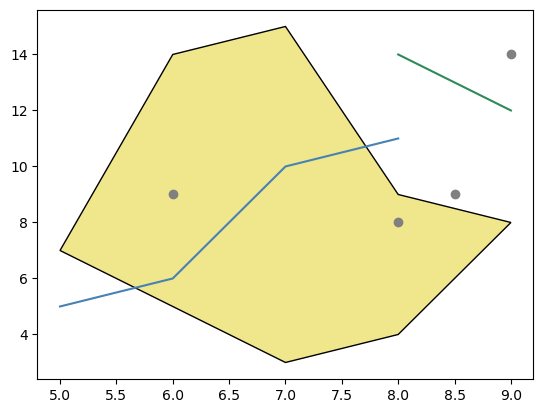

In [2]:
print ("Below we create arbitrary shapes and plot them")
line1_x, lines1_y = LineString([(5, 5), (6, 6), (7, 10), (8, 11)]).xy
plt.plot(line1_x, lines1_y, color="steelblue")
line2_x, lines2_y = LineString([(8, 14), (9, 12)]).xy
plt.plot(line2_x, lines2_y, color="seagreen")

polygon = Polygon([(5, 7), (7, 3), (8, 4), (9, 8), (8, 9), (7, 15), (6, 14)])
polygon_x, polygon_y = polygon.exterior.xy
plt.fill(polygon_x, polygon_y, facecolor="khaki", edgecolor="black")

points = [Point(6, 9), Point(9, 14), Point(8, 8), Point(8.5, 9)]
points_x = [point.x for point in points]
points_y = [point.y for point in points]
plt.scatter(points_x, points_y, color="grey")

## **Attribute operations**

In [3]:
world = gpd.read_file("./data-module-2/world.shp")
world.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -180.000..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -131.7499..."
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.1144..."


In [4]:
midsized_countries = world[(world.area_km2 > 1000000)&(world.area_km2 < 5000000)]
midsized_countries.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
5,KZ,Kazakhstan,Asia,Asia,Central Asia,Sovereign country,2.729811e+06,17288285.0,71.620,23587.337515,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
8,ID,Indonesia,Asia,Asia,South-Eastern Asia,Sovereign country,1.819251e+06,255131116.0,68.856,10003.089029,"MULTIPOLYGON (((104.36999 -1.08484, 104.53949 ..."
9,AR,Argentina,South America,Americas,South America,Sovereign country,2.784469e+06,42981515.0,76.252,18797.547947,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
11,CD,Democratic Republic of the Congo,Africa,Africa,Middle Africa,Sovereign country,2.323492e+06,73722860.0,58.782,785.347341,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
14,SD,Sudan,Africa,Africa,Northern Africa,Sovereign country,1.850886e+06,37737913.0,64.002,4188.334814,"MULTIPOLYGON (((23.88711 8.61977, 23.80581 8.6..."


Text(0.5, 1.0, 'Mid-sized countries')

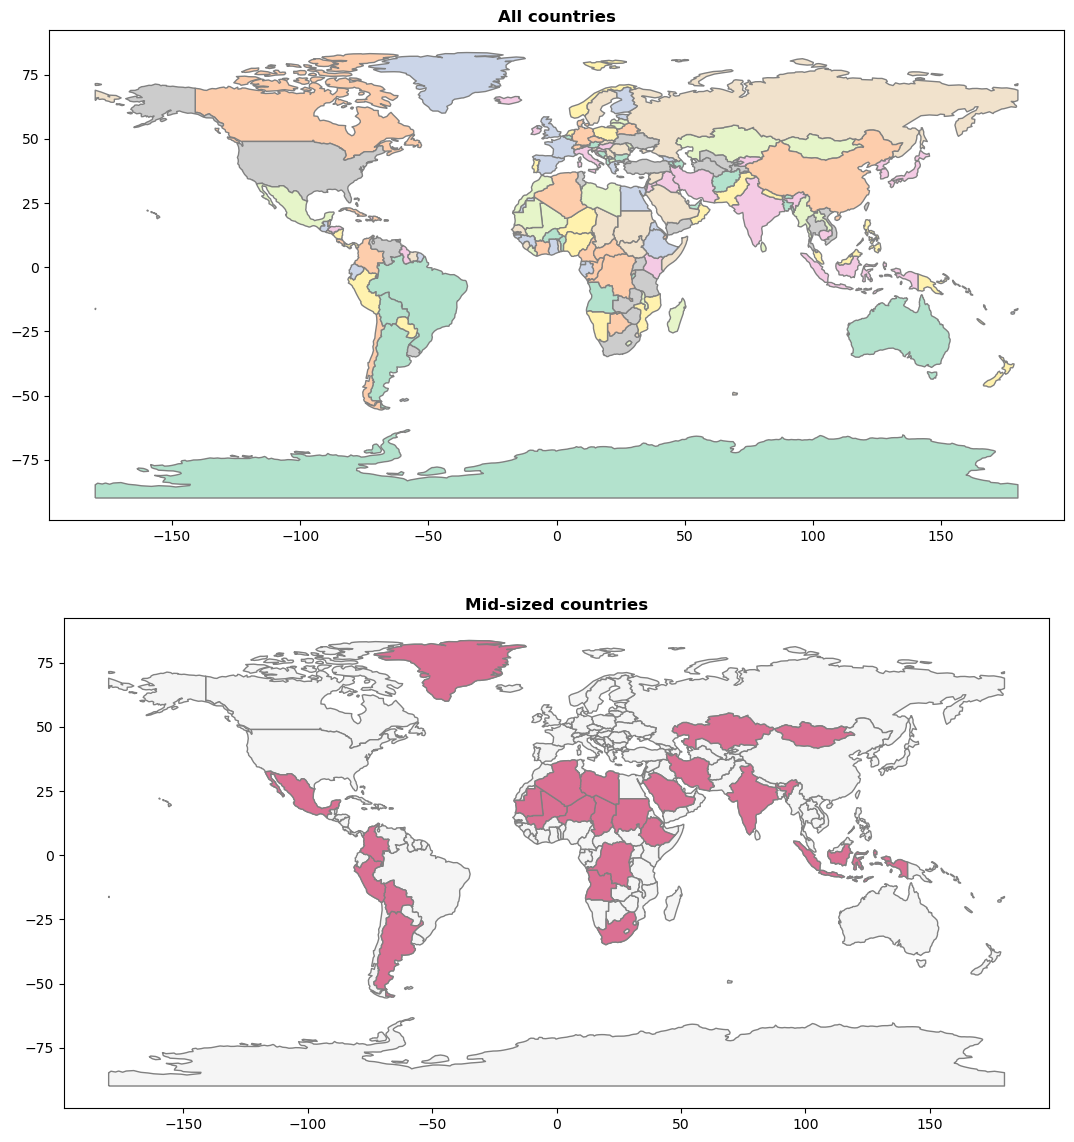

In [5]:
fig, axs = plt.subplots(2,1, figsize=(14,14))
world.plot(ax=axs[0], column="iso_a2", cmap="Pastel2", edgecolor="grey")
axs[0].set_title("All countries", weight="bold")
world.plot(ax=axs[1], color="whitesmoke", edgecolor="grey")
midsized_countries.plot(ax=axs[1], facecolor="palevioletred", edgecolor="grey")
axs[1].set_title("Mid-sized countries", weight="bold")

### Dissolve  by attributes

In [6]:
continents = world[["continent", "geometry", "pop"]].dissolve(by="continent", aggfunc="sum")
continents

,geometry,pop
continent,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.154947e+09
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",0.000000e+00
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4.311408e+09
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",6.690363e+08
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",5.650287e+08
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",3.775783e+07
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",0.000000e+00
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",4.120608e+08


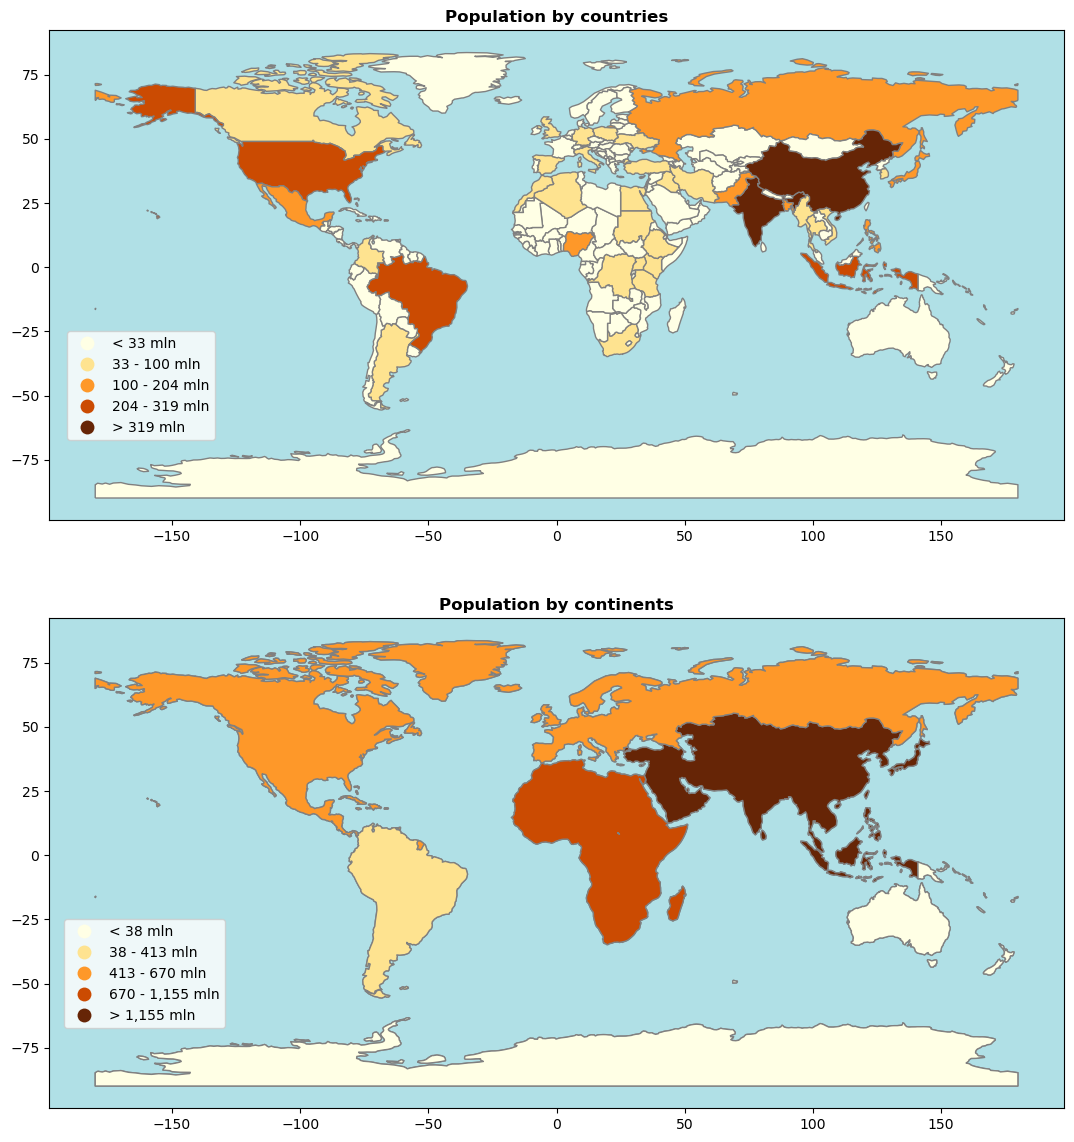

In [7]:
fig, axs = plt.subplots(2,1, figsize=(14,14))
world["pop"] = world["pop"].fillna(0)
world.plot(ax=axs[0], column="pop", legend=True, scheme="User_Defined", cmap="YlOrBr", 
           edgecolor="grey", classification_kwds=dict(bins=[33000000,100000000,204000000,319000000]),
           legend_kwds={"labels": ["< 33 mln", "33 - 100 mln", "100 - 204 mln", 
                                   "204 - 319 mln", "> 319 mln"], "bbox_to_anchor":(0.17, 0.4)})
axs[0].set_title("Population by countries", weight="bold")
axs[0].set_facecolor("powderblue")
continents.plot(ax=axs[1], column="pop", cmap="afmhot_r", edgecolor="grey")
continents.plot(ax=axs[1], column="pop", legend=True, scheme="User_Defined", cmap="YlOrBr", 
           edgecolor="grey", classification_kwds=dict(bins=[38000000,413000000,670000000,1155000000]),
           legend_kwds={"labels": ["< 38 mln", "38 - 413 mln", "413 - 670 mln", "670 - 1,155 mln",
                                   "> 1,155 mln"], "bbox_to_anchor":(0.18, 0.4)})
axs[1].set_title("Population by continents", weight="bold")
axs[1].set_facecolor("powderblue")

### Join by attributes

In [8]:
coffee_data = pd.read_csv("./data-module-2/coffee_data.csv")
coffee_data.head()

,Unnamed: 0,name_long,coffee_production_2016,coffee_production_2017
0,1,Angola,NaN,NaN
1,2,Bolivia,3.0,4.0
2,3,Brazil,3277.0,2786.0
3,4,Burundi,37.0,38.0
4,5,Cameroon,8.0,6.0


In [9]:
world_coffee = world.merge(coffee_data, on="name_long")
world_coffee.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,Unnamed: 0,coffee_production_2016,coffee_production_2017
0,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163,2402.099404,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",37,81.0,66.0
1,PG,Papua New Guinea,Oceania,Oceania,Melanesia,Sovereign country,4.645201e+05,7755785.0,65.230,3709.081644,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",31,114.0,74.0
2,ID,Indonesia,Asia,Asia,South-Eastern Asia,Sovereign country,1.819251e+06,255131116.0,68.856,10003.089029,"MULTIPOLYGON (((104.36999 -1.08484, 104.53949 ...",21,742.0,360.0
3,KE,Kenya,Africa,Africa,Eastern Africa,Sovereign country,5.908369e+05,46024250.0,66.242,2753.236135,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",23,60.0,50.0
4,DO,Dominican Republic,North America,Americas,Caribbean,Sovereign country,4.815787e+04,10405844.0,73.483,12663.042247,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",12,1.0,NaN


**Additional information on merging tabular data can be found in the documentation:**  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html

Text(0.5, 1.0, '2017 coffee production')

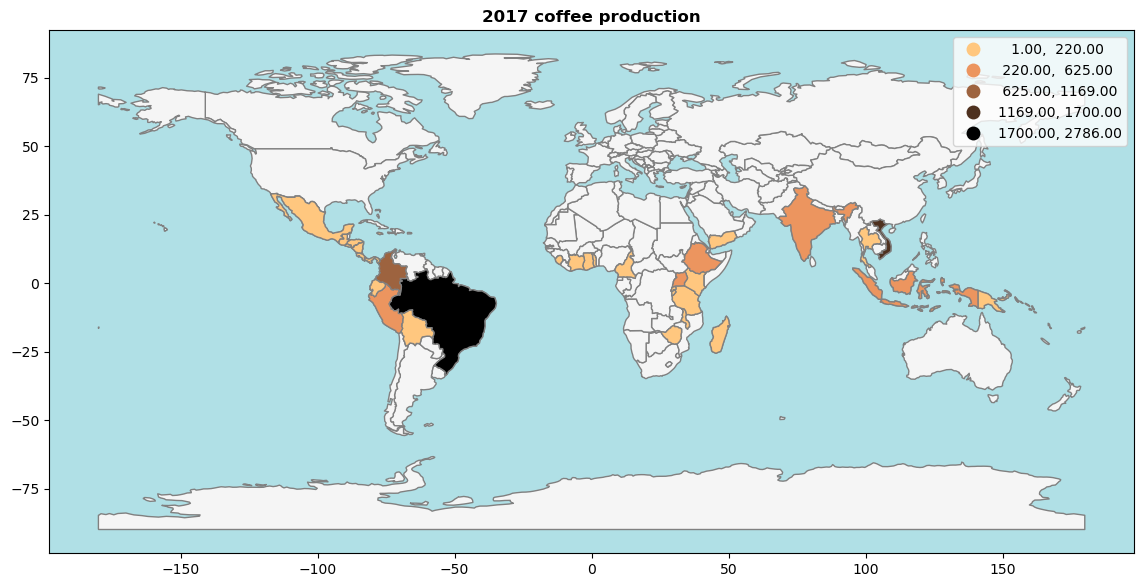

In [10]:
fig, ax = plt.subplots(figsize=(14,7))
world.plot(ax=ax, color="whitesmoke", edgecolor="grey")
world_coffee.plot(ax=ax, column="coffee_production_2017", cmap="copper_r", edgecolor="grey",
                 scheme="FisherJenks", legend=True)
ax.set_facecolor("powderblue")
ax.set_title("2017 coffee production", weight="bold")

## **Spatial operations**
### Types of spatial relationships

Different types of relationships between spatial features


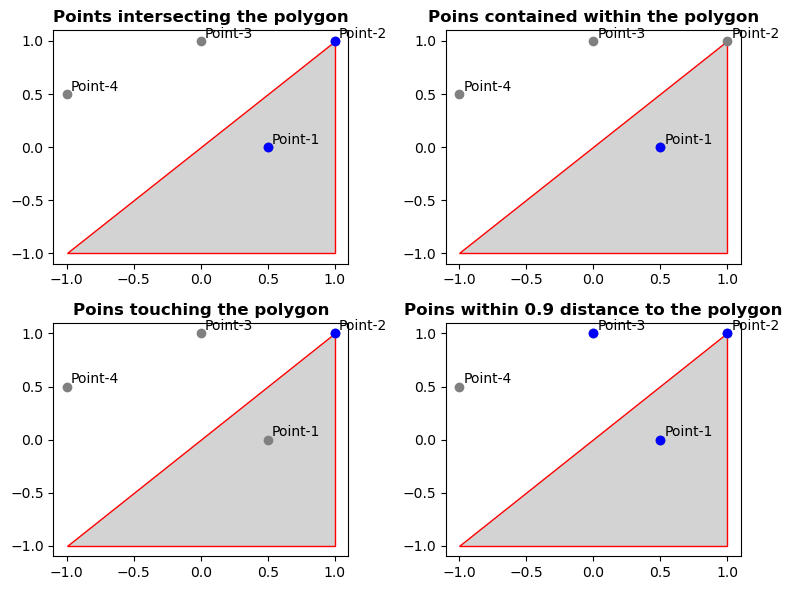

In [11]:
print ("Different types of relationships between spatial features") 
polygon = Polygon([(-1, -1), (1, -1), (1, 1), (-1, -1)])
polygon_x, polygon_y = polygon.exterior.xy
points = [Point(0.5, 0), Point(1, 1), Point(0, 1), Point(-1, 0.5)]
points_x = [point.x for point in points]
points_y = [point.y for point in points]

fig, axs = plt.subplots(2,2, figsize=(8,6))
for ax in [(0,0), (0,1), (1,0), (1,1)]:
    axs[ax].fill(polygon_x, polygon_y, facecolor="lightgray", edgecolor="red")
    axs[ax].scatter(points_x, points_y, color="grey")
    annotations=["Point-1","Point-2","Point-3","Point-4"]
    for i, label in enumerate(annotations):
        axs[ax].annotate(label, (points_x[i]+0.03, points_y[i]+0.03))

selected = [p for p in points if polygon.intersects(p)]
selected_x = [p.x for p in selected]
selected_y = [p.y for p in selected]
axs[0,0].scatter(selected_x, selected_y, color="blue")
axs[0,0].set_title("Points intersecting the polygon", weight="bold")

selected = [p for p in points if polygon.contains(p)]
selected_x = [p.x for p in selected]
selected_y = [p.y for p in selected]
axs[0,1].scatter(selected_x, selected_y, color="blue")
axs[0,1].set_title("Poins contained within the polygon", weight="bold")

selected = [p for p in points if polygon.touches(p)]
selected_x = [p.x for p in selected]
selected_y = [p.y for p in selected]
axs[1,0].scatter(selected_x, selected_y, color="blue")
axs[1,0].set_title("Poins touching the polygon", weight="bold")

selected = [p for p in points if polygon.distance(p)<=0.9]
selected_x = [p.x for p in selected]
selected_y = [p.y for p in selected]
axs[1,1].scatter(selected_x, selected_y, color="blue")
axs[1,1].set_title("Poins within 0.9 distance to the polygon", weight="bold")
plt.tight_layout()

### Spatial joins (intersects)

In [12]:
nz = gpd.read_file("./data-module-2/nz.shp")
nz_height = gpd.read_file("./data-module-2/nz_height.shp")
canterbury = nz[nz.Name == "Canterbury"]
canterbury_height = gpd.sjoin(nz_height, canterbury, predicate="intersects")

**Additional information on spatial joins with `geopandas` can be found in the documentation:** 
- https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
- https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

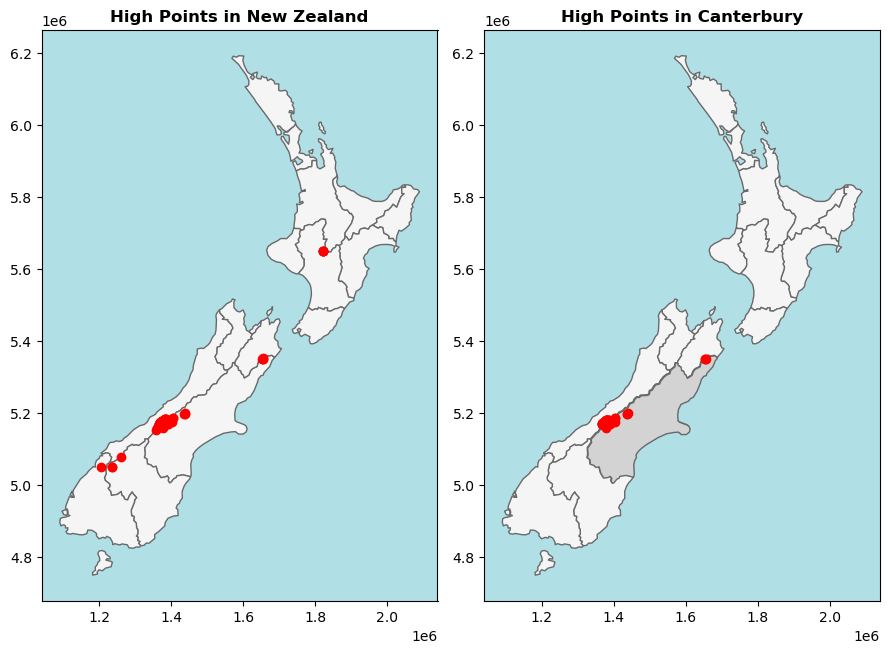

In [13]:
fig, axs = plt.subplots(1,2, figsize=(9,9))
nz.plot(ax=axs[0], edgecolor="dimgrey", facecolor="whitesmoke")
nz_height.plot(ax=axs[0],color="red")
axs[0].set_title("High Points in New Zealand", weight="bold")
axs[0].set_facecolor("powderblue")
nz.plot(ax=axs[1], edgecolor="dimgrey", facecolor="whitesmoke")
canterbury.plot(ax=axs[1], edgecolor="dimgrey", facecolor="lightgrey")
canterbury_height.plot(ax=axs[1], color="red")
axs[1].set_title("High Points in Canterbury", weight="bold")
axs[1].set_facecolor("powderblue")
plt.tight_layout()

### Spatial joins (within, contains)

In [14]:
minx, miny, maxx, maxy = world.total_bounds
random.seed(200)
points = []
while len(points) < 10:
    pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
    if world.contains(pnt).any():
        points.append(pnt)
points_gpd = gpd.GeoDataFrame(geometry=points, crs="epsg:4326")
points_gpd

,geometry
0,POINT (-119.80426 -87.08403)
1,POINT (-110.57171 58.10353)
2,POINT (-4.67711 21.54996)
3,POINT (129.95361 -23.40535)
4,POINT (115.30103 -70.60125)
5,POINT (-98.86064 26.94549)
6,POINT (102.81242 47.83418)
7,POINT (-94.50239 40.14810)
8,POINT (28.83515 29.59003)
9,POINT (113.16285 34.10495)


In [15]:
points_within_world = gpd.sjoin(points_gpd, world, predicate="within")
points_within_world.head()

,geometry,index_right,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap
0,POINT (-119.80426 -87.08403),159,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,0.0,NaN,NaN
4,POINT (115.30103 -70.60125),159,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,0.0,NaN,NaN
1,POINT (-110.57171 58.10353),3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525
2,POINT (-4.67711 21.54996),52,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622
3,POINT (129.95361 -23.40535),137,AU,Australia,Oceania,Oceania,Australia and New Zealand,Country,7.687614e+06,23504138.0,82.300000,43547.197484


In [16]:
world_with_points = gpd.sjoin(world, points_gpd, predicate="contains")
world_with_points.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,index_right
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -131.7499...",1
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.1144...",5
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.1144...",7
52,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622,"POLYGON ((-11.51394 12.44299, -11.46790 12.754...",2
97,MN,Mongolia,Asia,Asia,Eastern Asia,Sovereign country,1.544322e+06,2923896.0,68.847000,11348.647341,"POLYGON ((87.75126 49.29720, 88.80557 49.47052...",6


Text(0.5, 1.0, 'Countries containing random points')

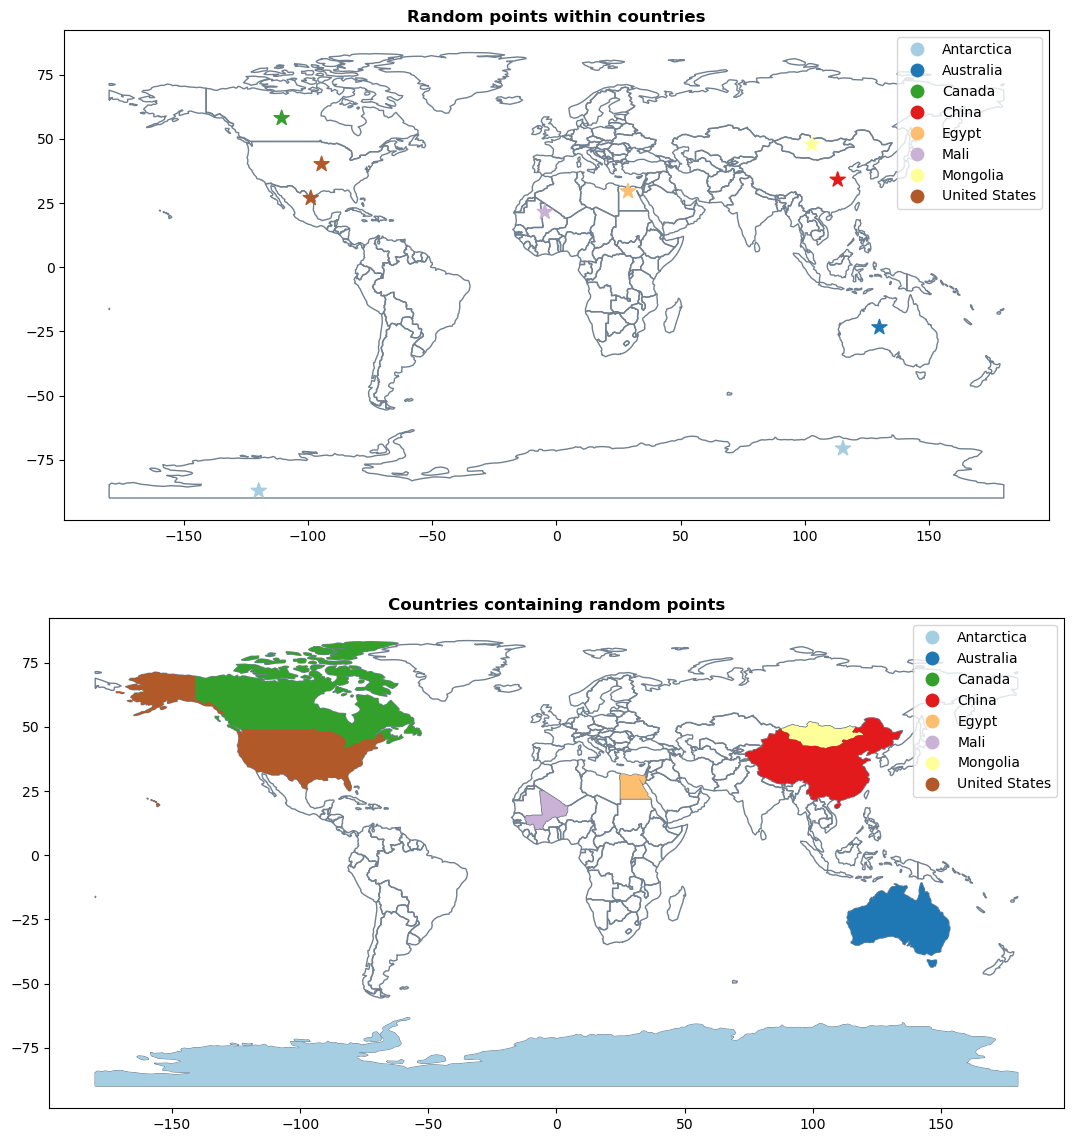

In [17]:
fig, axs = plt.subplots(2,1, figsize=(14,14))
world.plot(ax=axs[0], edgecolor="slategrey", facecolor="none")
points_within_world.plot(ax=axs[0], marker="*", markersize=130, column="name_long", legend=True, cmap="Paired")
axs[0].set_title("Random points within countries", weight="bold")
world.plot(ax=axs[1], edgecolor="slategrey", facecolor="none")
world_with_points.plot(ax=axs[1], column="name_long", legend=True, cmap="Paired")
axs[1].set_title("Countries containing random points", weight="bold")

### Combining operations (spatial join + dissolve)

In [18]:
nz_merged = gpd.sjoin(nz, nz_height, predicate="contains")
nz_merged = nz_merged[["Name", "geometry", "elevation"]].dissolve(by=["Name"], aggfunc="mean")
nz_merged.head()

,geometry,elevation
Name,,
Canterbury,"POLYGON ((1641829.894 5293955.832, 1639332.138...",2994.6
Manawatu-Wanganui,"POLYGON ((1868949.091 5654440.431, 1865828.826...",2777.0
Marlborough,"MULTIPOLYGON (((1679241.140 5359477.533, 16677...",2720.0
Otago,"POLYGON ((1336955.651 5118634.251, 1325903.335...",2825.0
Southland,"MULTIPOLYGON (((1218477.778 4806498.449, 12297...",2723.0


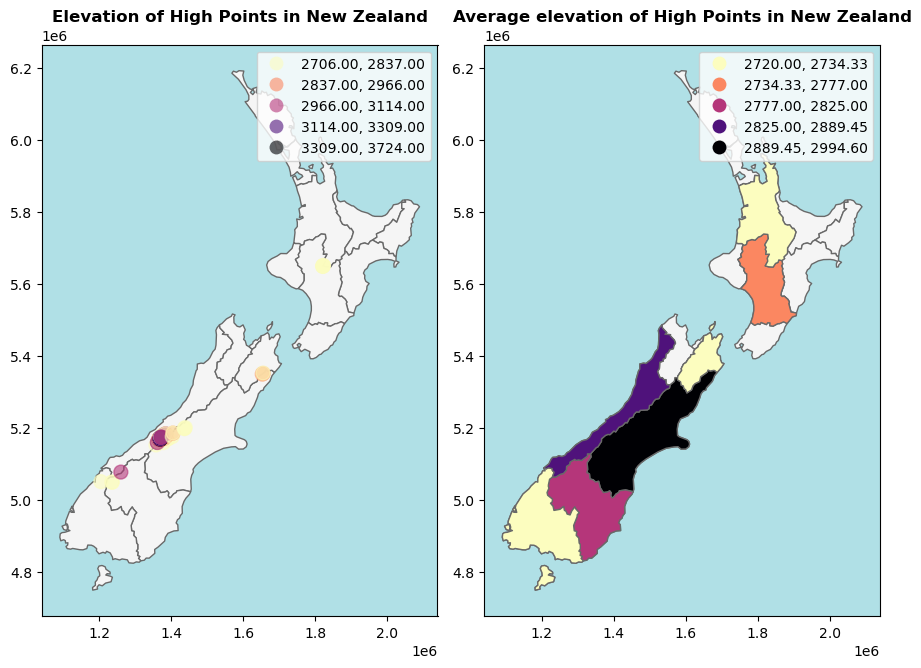

In [19]:
fig, axs = plt.subplots(1,2, figsize=(9,9))
nz.plot(ax=axs[0], edgecolor="dimgrey", facecolor="whitesmoke")
nz_height.plot(ax=axs[0], marker = "o", markersize=100, alpha=0.6, column="elevation", legend=True, scheme="FisherJenks", cmap="magma_r")
axs[0].set_title("Elevation of High Points in New Zealand", weight="bold")
axs[0].set_facecolor("powderblue")
nz.plot(ax=axs[1], edgecolor="dimgrey", facecolor="whitesmoke")
nz_merged.plot(ax=axs[1], column="elevation", edgecolor="dimgrey", legend=True,  scheme="FisherJenks", cmap="magma_r")
axs[1].set_title("Average elevation of High Points in New Zealand", weight="bold")
axs[1].set_facecolor("powderblue")
plt.tight_layout()

### Centroids

In [20]:
nz_centroid = nz.copy()
nz_centroid["geometry"] = nz.centroid
nz_centroid.head()

,Name,Island,Land_ar,Popultn,Mdn_ncm,Sex_rat,geometry
0,Northland,North,12500.561149,175500.0,23400,0.942453,POINT (1674704.958 6070011.136)
1,Auckland,North,4941.572557,1657200.0,29600,0.944286,POINT (1753550.944 5934750.688)
2,Waikato,North,23900.036383,460100.0,27900,0.952050,POINT (1819510.803 5787726.356)
3,Bay of Plenty,North,12071.144689,299900.0,26200,0.928039,POINT (1935307.866 5769702.580)
4,Gisborne,North,8385.826619,48500.0,24400,0.934973,POINT (2030849.434 5751714.451)


In [21]:
seine = gpd.read_file("./data-module-2/seine.shp")
seine_centroid = seine.copy()
seine_centroid["geometry"] = seine.centroid
seine_centroid

,name,geometry
0,Marne,POINT (776364.834 6849340.410)
1,Seine,POINT (664920.432 6851104.913)
2,Yonne,POINT (738885.791 6736309.478)


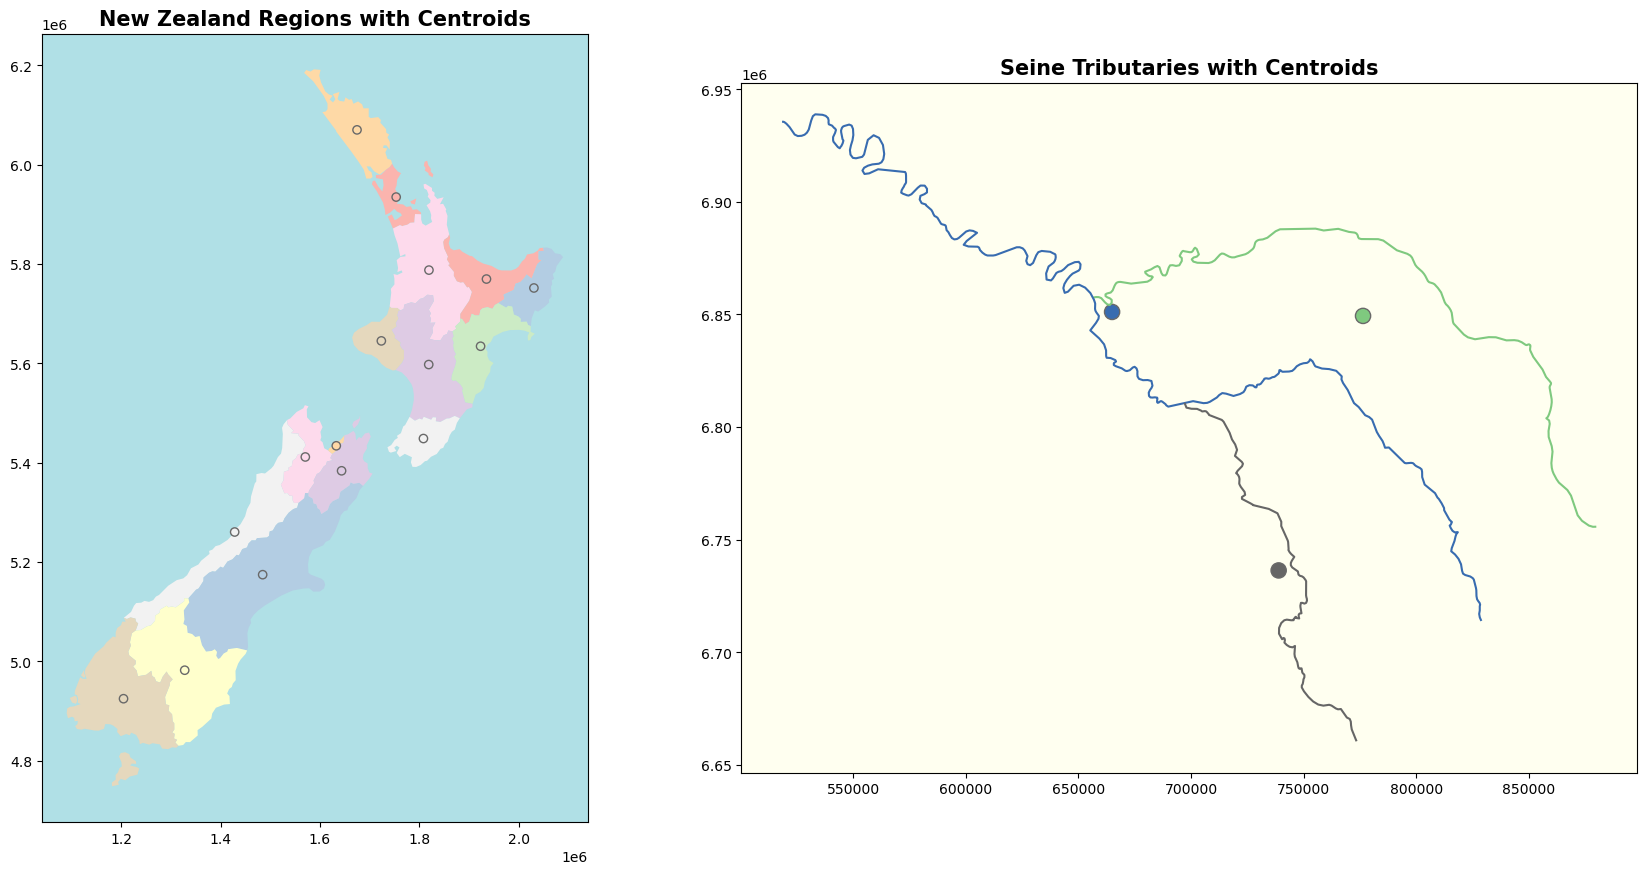

In [22]:
fig, axs = plt.subplots(1,2, figsize=(18,9))
nz.plot(ax=axs[0], column="Name", cmap="Pastel1")
nz_centroid.plot(ax=axs[0], edgecolor="dimgrey", column="Name", cmap="Pastel1")
axs[0].set_title("New Zealand Regions with Centroids", weight="bold",  fontsize=15)
axs[0].set_facecolor("powderblue")

seine.plot(ax=axs[1], column="name", cmap="Accent")
seine_centroid.plot(ax=axs[1], edgecolor="dimgrey", column="name", cmap="Accent", markersize=120)
axs[1].set_title("Seine Tributaries with Centroids", weight="bold",  fontsize=15)
axs[1].set_facecolor("ivory")
plt.tight_layout()

### Buffer

In [23]:
nz_buffer = nz.copy()
nz_buffer["geometry"] = nz.buffer(50000)
seine_buffer = seine.copy()
seine_buffer["geometry"] = seine.buffer(5000)

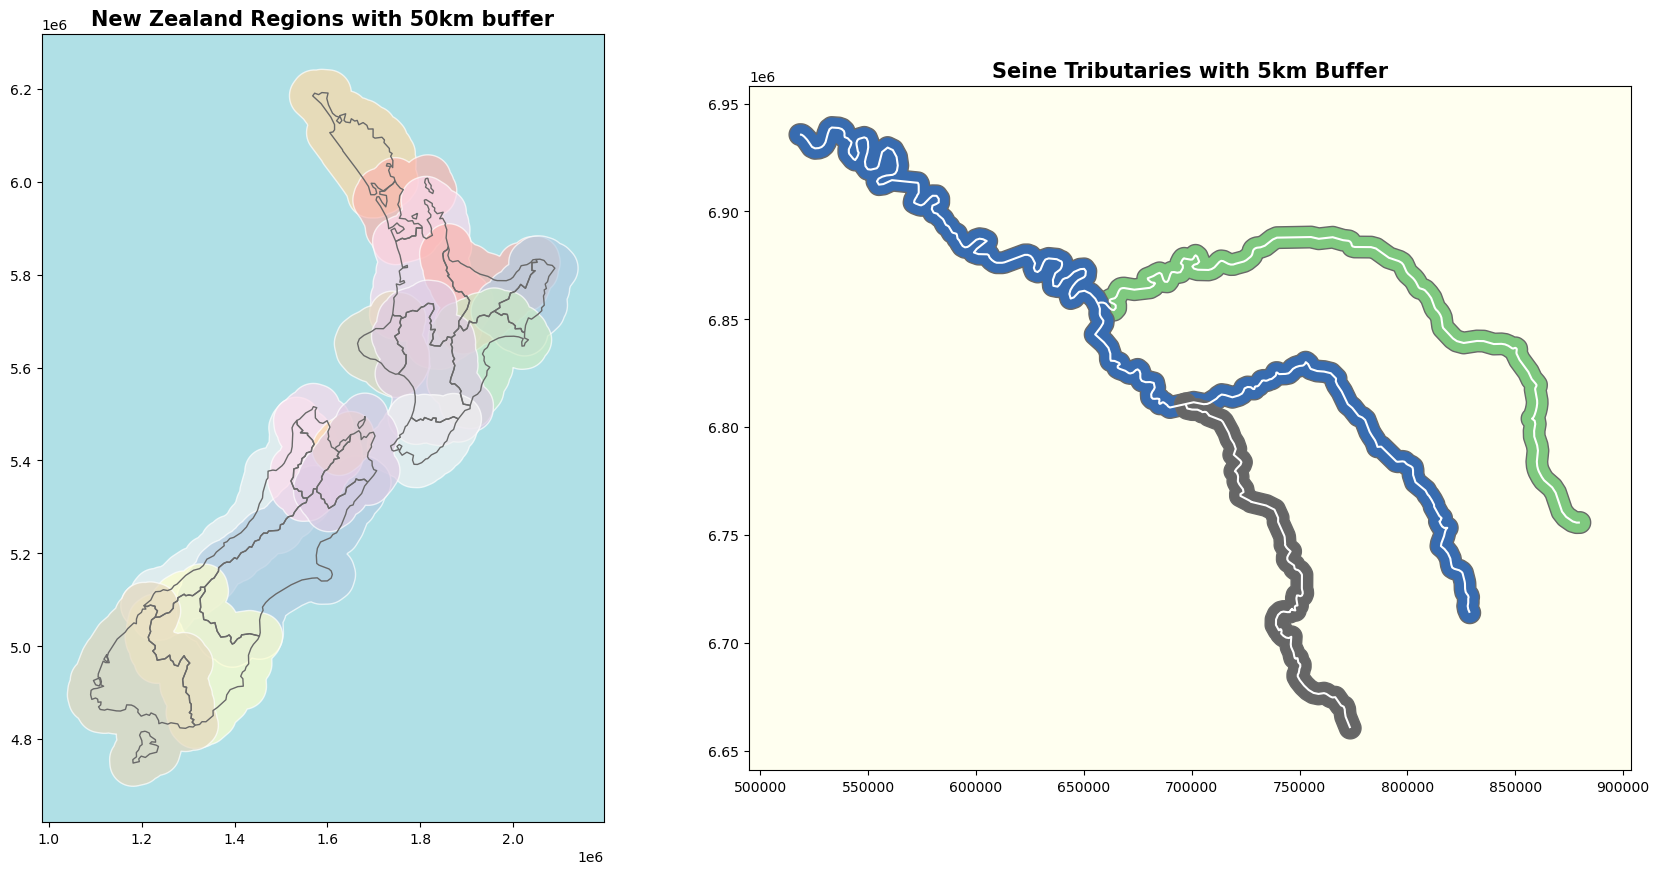

In [24]:
fig, axs = plt.subplots(1,2, figsize=(18,9))
nz_buffer.plot(ax=axs[0], edgecolor="white", column="Name", cmap="Pastel1", alpha=0.7)
nz.plot(ax=axs[0], facecolor="none", edgecolor="dimgrey")
axs[0].set_title("New Zealand Regions with 50km buffer", weight="bold", fontsize=15)
axs[0].set_facecolor("powderblue")

seine_buffer.plot(ax=axs[1], edgecolor="dimgrey", column="name", cmap="Accent")
seine.plot(ax=axs[1], color="white")
axs[1].set_title("Seine Tributaries with 5km Buffer", weight="bold", fontsize=15)
axs[1].set_facecolor("ivory")
plt.tight_layout()

### Overlay to create new shapes

In [25]:
uganda =  world[(world.name_long == "Uganda")]
lakes_gdf = gpd.read_file("./data-module-2/lakes.shp")
lake_segments = gpd.overlay(lakes_gdf, uganda)

In [26]:
lakes_inter = gpd.sjoin(lakes_gdf, uganda, predicate="intersects")
lakes_within = gpd.sjoin(lakes_gdf, uganda, predicate="within")

Text(0.5, 1.0, 'Lakes overlayed')

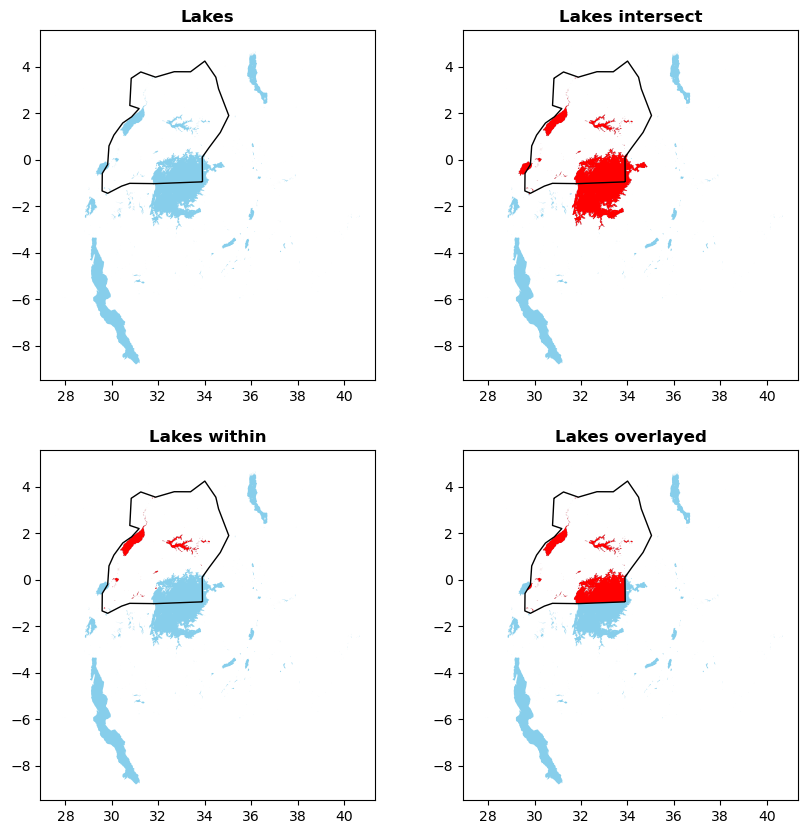

In [27]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
lakes_gdf.plot(ax=axs[0,0], facecolor="skyblue", edgecolor="none")
uganda.plot(ax=axs[0,0], facecolor="none", edgecolor="black")
axs[0,0].set_title("Lakes", weight="bold")
lakes_gdf.plot(ax=axs[0,1], facecolor="skyblue", edgecolor="none")
lakes_inter.plot(ax=axs[0,1], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[0,1], facecolor="none", edgecolor="black")
axs[0,1].set_title("Lakes intersect", weight="bold")
lakes_gdf.plot(ax=axs[1,0], facecolor="skyblue", edgecolor="none")
lakes_within.plot(ax=axs[1,0], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[1,0], facecolor="none", edgecolor="black")
axs[1,0].set_title("Lakes within", weight="bold")
lakes_gdf.plot(ax=axs[1,1], facecolor="skyblue", edgecolor="none")
lake_segments.plot(ax=axs[1,1], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[1,1], facecolor="none", edgecolor="black")
axs[1,1].set_title("Lakes overlayed", weight="bold")

## **Exercices**
### Data
- `gw_provinces_extra.shp` - Minnesota Groundwater Provinces shapefile;
- `mn_rivers.shp` - Minnesota river shapefile;
- `soil_samp.shp` - Soil temperature stations shapefile.

**Question 1. Find and plot all groundwater provinces in Minnesota that have `var1` equal to `"a"` and `var3` greater than 100.**

**Question 2. Create a simple `DataFrame` with the following code:**
```r
random.seed(0) 
data = {"ProvID": list(range(1,7)),
        "var4":["yes", "no", "no", "yes", "np", "yes"],
        "var5": random.sample(range(10, 50), 6)}
gw_prov_df = pd.DataFrame(data)
```
**Merge `gw_provinces_extra_gdf` with `gw_prov_df` into a new object called `gw_prov_stats`. Which columns were used as keys for join? Pay attention to the data type of these columns.**

**Question 3. Dissolve `var3` as `sum` by `var1`.**

**Question 4. Find and plot the rivers found (even partially) in groundwater PROVINCE 5.**

**Question 5. Which groundwater province does the Lamberton (soil sample) site located in?**

**Question 6. Find the soil sample sites that are within 10 km of the Mississippi river.**

**Question 7. Find 10-km buffer for Mississippi river, the centroid for Mississippi river, and Mississippi river segments overlap PROVINCE 4 (use `overlay` operation). Display results on a figure with 3 subplots.**